In [144]:
from pandas import DataFrame, concat
from pandas import read_csv
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

In [145]:
dataset = read_csv('with_timestamp.csv', header=0, index_col=0)
dataset.drop(["@timestamp", "anomaly"], axis=1, inplace=True)
dataset.head()

,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.softirq.pct,system.cpu.system.pct,system.cpu.total.pct,system.cpu.user.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.request.merges_per_sec,...,jolokia.metrics.threading.thread_count,system.load.1,system.load.15,system.load.5,system.load.norm.1,system.load.norm.15,system.load.norm.5,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct
0,3.5818,0.0474,0.0312,0.1058,0.4182,0.2338,0.698,12.601,0.165,0.0,...,995,0.68,0.97,1.00,0.170,0.243,0.250,0.6904,0.0,0.9620
1,3.5080,0.0934,0.0271,0.1054,0.4920,0.2661,0.572,11.104,0.137,0.0,...,995,0.58,0.96,0.97,0.145,0.240,0.243,0.6903,0.0,0.9626
2,3.5337,0.1136,0.0291,0.1025,0.4663,0.2211,0.572,11.104,0.137,0.0,...,995,0.65,0.96,0.97,0.163,0.240,0.243,0.6904,0.0,0.9628
3,3.5742,0.0503,0.0201,0.0916,0.4258,0.2637,0.572,11.104,0.137,0.0,...,995,0.68,0.95,0.95,0.170,0.238,0.238,0.6903,0.0,0.9635
4,3.5454,0.0705,0.0268,0.1051,0.4546,0.2522,0.572,11.104,0.137,0.0,...,995,0.68,0.95,0.95,0.170,0.238,0.238,0.6905,0.0,0.9638


## Normalizing Data

In [146]:
dataset[dataset.columns] = StandardScaler().fit_transform(dataset)

## Shifting the dataset
shifting only one minute

In [147]:
dataset_shifted = dataset.shift(-6)
dataset = dataset.iloc[:-6]
dataset_shifted = dataset_shifted.iloc[:-6]

## Spliting the dataset 
Ratio - 80 : 20

In [148]:
train = dataset.shape[0] * 2 // 10
    
train_dataset = dataset.iloc[:-train]
train_dataset_shifted = dataset_shifted.iloc[:-train]

test_dataset = dataset.iloc[-train:]
test_dataset_shifted = dataset_shifted.iloc[-train:]

In [149]:
train_dataset = train_dataset.values.reshape((train_dataset.shape[0], 1, train_dataset.shape[1]))
print(train_dataset_shifted.shape)

(39996, 39)


## Training Models

### Feature Set 1
- system.cpu.iowait.pct'
- system.diskio_sda.iostat.await'
- system.diskio_sda.iostat.busy'
- system.diskio_sda.iostat.queue.avg_size'
- system.diskio_sda.iostat.read.request.merges_per_sec'
- system.diskio_sda.iostat.read.request.per_sec'
- system.diskio_sda.iostat.request.avg_size'
- system.diskio_sda.iostat.service_time'
- system.diskio_sda.iostat.write.request.merges_per_sec'
- system.diskio_sda.iostat.write.request.per_sec'
- system.diskio_sda2.iostat.await'
- system.diskio_sda2.iostat.busy'
- system.diskio_sda2.iostat.queue.avg_size'
- system.diskio_sda2.iostat.read.request.merges_per_sec'
- system.diskio_sda2.iostat.read.request.per_sec'
- system.diskio_sda2.iostat.request.avg_size'
- system.diskio_sda2.iostat.service_time'
- system.diskio_sda2.iostat.write.request.merges_per_sec'
- system.diskio_sda2.iostat.write.request.per_sec'

In [150]:
train_dataset_shifted_1 = train_dataset_shifted[[
    'system.cpu.iowait.pct',
    'system.diskio_sda.iostat.await',
    'system.diskio_sda.iostat.busy',
    'system.diskio_sda.iostat.queue.avg_size',
    'system.diskio_sda.iostat.read.request.merges_per_sec',
    'system.diskio_sda.iostat.read.request.per_sec',
    'system.diskio_sda.iostat.request.avg_size',
    'system.diskio_sda.iostat.service_time',
    'system.diskio_sda.iostat.write.request.merges_per_sec',
    'system.diskio_sda.iostat.write.request.per_sec',
    'system.diskio_sda2.iostat.await',
    'system.diskio_sda2.iostat.busy',
    'system.diskio_sda2.iostat.queue.avg_size',
    'system.diskio_sda2.iostat.read.request.merges_per_sec',
    'system.diskio_sda2.iostat.read.request.per_sec',
    'system.diskio_sda2.iostat.request.avg_size',
    'system.diskio_sda2.iostat.service_time',
    'system.diskio_sda2.iostat.write.request.merges_per_sec',
    'system.diskio_sda2.iostat.write.request.per_sec']]
train_dataset_shifted_1.head()

,system.cpu.iowait.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.request.merges_per_sec,system.diskio_sda.iostat.read.request.per_sec,system.diskio_sda.iostat.request.avg_size,system.diskio_sda.iostat.service_time,system.diskio_sda.iostat.write.request.merges_per_sec,system.diskio_sda.iostat.write.request.per_sec,system.diskio_sda2.iostat.await,system.diskio_sda2.iostat.busy,system.diskio_sda2.iostat.queue.avg_size,system.diskio_sda2.iostat.read.request.merges_per_sec,system.diskio_sda2.iostat.read.request.per_sec,system.diskio_sda2.iostat.request.avg_size,system.diskio_sda2.iostat.service_time,system.diskio_sda2.iostat.write.request.merges_per_sec,system.diskio_sda2.iostat.write.request.per_sec
0,-0.126642,-0.145439,-0.200244,-0.120378,-0.036651,-0.060667,-0.145092,-0.192760,-0.060835,1.143935,-0.132459,-0.200173,-0.121455,-0.036656,-0.060681,-0.130237,-0.192853,-0.060835,1.151815
1,-0.001994,-0.116965,-0.058010,-0.072736,-0.036651,-0.053136,-0.307858,-0.132323,-0.055074,1.011877,-0.107455,-0.057741,-0.073145,-0.036656,-0.053127,-0.269181,-0.132691,-0.055074,1.019195
2,-0.070217,-0.116965,-0.058010,-0.072736,-0.036651,-0.053136,-0.307858,-0.132323,-0.055074,1.011877,-0.107455,-0.057741,-0.073145,-0.036656,-0.053127,-0.269181,-0.132691,-0.055074,1.019195
3,0.123168,-0.116965,-0.058010,-0.072736,-0.036651,-0.053136,-0.307858,-0.132323,-0.055074,1.011877,-0.107455,-0.057741,-0.073145,-0.036656,-0.053127,-0.269181,-0.132691,-0.055074,1.019195
4,-0.060471,-0.116965,-0.058010,-0.072736,-0.036651,-0.053136,-0.307858,-0.132323,-0.055074,1.011877,-0.107455,-0.057741,-0.073145,-0.036656,-0.053127,-0.269181,-0.132691,-0.055074,1.019195


In [151]:
model_lstm_1 = Sequential()
model_lstm_1.add(LSTM(10, input_shape=(1, train_dataset_shifted.shape[1])))
model_lstm_1.add(Dense(19))
model_lstm_1.compile(loss='mae', optimizer='adam')

model_lstm_1.fit(train_dataset, train_dataset_shifted_1, verbose=2, shuffle=False)

Epoch 1/1
 - 10s - loss: 0.1530


### Feature Set 2
- system.cpu.total.pct'
- system.cpu.user.pct'

In [152]:
train_dataset_shifted_2 = train_dataset_shifted[[
    'system.cpu.total.pct',
    'system.cpu.user.pct']]

train_dataset_shifted_2.head()

,system.cpu.total.pct,system.cpu.user.pct
0,-0.282538,-0.241286
1,-0.235823,-0.235949
2,-0.259415,-0.255883
3,-0.148017,-0.187449
4,-0.247541,-0.233281


In [153]:
model_lstm_2 = Sequential()
model_lstm_2.add(LSTM(10, input_shape=(1, train_dataset_shifted.shape[1])))
model_lstm_2.add(Dense(2))
model_lstm_2.compile(loss='mae', optimizer='adam')

model_lstm_2.fit(train_dataset, train_dataset_shifted_2, verbose=2, shuffle=False)

Epoch 1/1
 - 8s - loss: 0.1681


### Feature Set 3
- jolokia.metrics.memory.heap_memory_usage.committed'
- jolokia.metrics.memory.heap_memory_usage.max'

In [154]:
train_dataset_shifted_3 = train_dataset_shifted[[
    'jolokia.metrics.memory.heap_memory_usage.committed',
    'jolokia.metrics.memory.heap_memory_usage.max']]

train_dataset_shifted_3.head()

,jolokia.metrics.memory.heap_memory_usage.committed,jolokia.metrics.memory.heap_memory_usage.max
0,-0.360082,-0.360082
1,-0.005949,-0.005949
2,-0.005949,-0.005949
3,-0.005949,-0.005949
4,-0.005949,-0.005949


In [155]:
model_lstm_3 = Sequential()
model_lstm_3.add(LSTM(10, input_shape=(1, train_dataset_shifted.shape[1])))
model_lstm_3.add(Dense(2))
model_lstm_3.compile(loss='mae', optimizer='adam')

model_lstm_3.fit(train_dataset, train_dataset_shifted_3, verbose=2, shuffle=False)

Epoch 1/1
 - 10s - loss: 0.3776


### Feature Set 4
- system.load.1'
- system.load.15'
- system.load.5'
- system.load.norm.1'
- system.load.norm.15'
- system.load.norm.5'

In [156]:
train_dataset_shifted_4 = train_dataset_shifted[[
    'system.load.1',
    'system.load.15',
    'system.load.5',
    'system.load.norm.1',
    'system.load.norm.15',
    'system.load.norm.5']]

train_dataset_shifted_4.head()

,system.load.1,system.load.15,system.load.5,system.load.norm.1,system.load.norm.15,system.load.norm.5
0,-0.154500,-0.134027,-0.134026,-0.156827,-0.136740,-0.136533
1,-0.150089,-0.134027,-0.134026,-0.152417,-0.136740,-0.136533
2,-0.142368,-0.133203,-0.132818,-0.144699,-0.136080,-0.135325
3,-0.085016,-0.127432,-0.119526,-0.087363,-0.130145,-0.122034
4,-0.085016,-0.127432,-0.119526,-0.087363,-0.130145,-0.122034


In [157]:
model_lstm_4 = Sequential()
model_lstm_4.add(LSTM(10, input_shape=(1, train_dataset_shifted.shape[1])))
model_lstm_4.add(Dense(6))
model_lstm_4.compile(loss='mae', optimizer='adam')

model_lstm_4.fit(train_dataset, train_dataset_shifted_4, verbose=2, shuffle=False)

Epoch 1/1
 - 8s - loss: 0.1248


### Feature Set 5
- system.cpu.idle.pct'
- system.cpu.softirq.pct'
- system.cpu.system.pct'
- jolokia.metrics.memory.heap_memory_usage.used'
- jolokia.metrics.memory.non_heap_memory_usage.used'
- jolokia.metrics.threading.daemon_thread_count'
- jolokia.metrics.threading.thread_count'
- system.memory.actual.used.pct'
- system.memory.swap.used.pct'
- system.memory.used.pct'

In [158]:
train_dataset_shifted_5 = train_dataset_shifted[[
    'system.cpu.idle.pct',
    'system.cpu.softirq.pct',
    'system.cpu.system.pct',
    'jolokia.metrics.memory.heap_memory_usage.used',
    'jolokia.metrics.memory.non_heap_memory_usage.used',
    'jolokia.metrics.threading.daemon_thread_count',
    'jolokia.metrics.threading.thread_count',
    'system.memory.actual.used.pct',
    'system.memory.swap.used.pct',
    'system.memory.used.pct']]

train_dataset_shifted_5.head()

,system.cpu.idle.pct,system.cpu.softirq.pct,system.cpu.system.pct,jolokia.metrics.memory.heap_memory_usage.used,jolokia.metrics.memory.non_heap_memory_usage.used,jolokia.metrics.threading.daemon_thread_count,jolokia.metrics.threading.thread_count,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct
0,0.282538,0.141898,-0.245786,1.185044,-1.669443,-0.793713,-1.115556,-1.046841,-0.078425,-0.263898
1,0.235823,0.414459,-0.151090,-0.705681,-1.669919,-0.960973,-1.122619,-1.042371,-0.078425,-0.212167
2,0.259415,0.885248,0.615090,-0.705681,-1.669919,-0.960973,-1.122619,-1.037900,-0.078425,-0.189997
3,0.148017,-0.155442,0.124390,-0.705681,-1.669919,-0.960973,-1.122619,-1.042371,-0.078425,-0.138265
4,0.247541,0.216233,0.098564,-0.705681,-1.669919,-0.960973,-1.122619,-1.037900,-0.078425,-0.116095


In [159]:
model_lstm_5 = Sequential()
model_lstm_5.add(LSTM(10, input_shape=(1, train_dataset_shifted.shape[1])))
model_lstm_5.add(Dense(10))
model_lstm_5.compile(loss='mae', optimizer='adam')

model_lstm_5.fit(train_dataset, train_dataset_shifted_5, verbose=2, shuffle=False)

Epoch 1/1
 - 8s - loss: 0.4402


## Predicting 

### set 1

In [160]:
test_dataset_predicted_1 = model_lstm_1.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [161]:
test_dataset_predicted_pd_1 = DataFrame(test_dataset_predicted_1)
test_dataset_predicted_pd_1.columns = train_dataset_shifted_1.columns

### set 2

In [162]:
test_dataset_predicted_2 = model_lstm_2.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [163]:
test_dataset_predicted_pd_2 = DataFrame(test_dataset_predicted_2)
test_dataset_predicted_pd_2.columns = train_dataset_shifted_2.columns

### set 3

In [164]:
test_dataset_predicted_3 = model_lstm_3.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [165]:
test_dataset_predicted_pd_3 = DataFrame(test_dataset_predicted_3)
test_dataset_predicted_pd_3.columns = train_dataset_shifted_3.columns

### set 4

In [166]:
test_dataset_predicted_4 = model_lstm_4.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [167]:
test_dataset_predicted_pd_4 = DataFrame(test_dataset_predicted_4)
test_dataset_predicted_pd_4.columns = train_dataset_shifted_4.columns

### set 5

In [168]:
test_dataset_predicted_5 = model_lstm_5.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [169]:
test_dataset_predicted_pd_5 = DataFrame(test_dataset_predicted_5)
test_dataset_predicted_pd_5.columns = train_dataset_shifted_5.columns

### Merging Predictions

In [170]:
test_dataset_predicted_pd = concat([
    test_dataset_predicted_pd_1, 
    test_dataset_predicted_pd_2, 
    test_dataset_predicted_pd_3,
    test_dataset_predicted_pd_4,
    test_dataset_predicted_pd_5], axis=1)

test_dataset_predicted_pd = test_dataset_predicted_pd.set_index(test_dataset_shifted.index)
test_dataset_predicted_pd.head()

,system.cpu.iowait.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.request.merges_per_sec,system.diskio_sda.iostat.read.request.per_sec,system.diskio_sda.iostat.request.avg_size,system.diskio_sda.iostat.service_time,system.diskio_sda.iostat.write.request.merges_per_sec,system.diskio_sda.iostat.write.request.per_sec,...,system.cpu.idle.pct,system.cpu.softirq.pct,system.cpu.system.pct,jolokia.metrics.memory.heap_memory_usage.used,jolokia.metrics.memory.non_heap_memory_usage.used,jolokia.metrics.threading.daemon_thread_count,jolokia.metrics.threading.thread_count,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct
39996,-0.133299,-0.120652,-0.118933,-0.101990,-0.033859,-0.058229,-0.074187,-0.117028,-0.145620,0.089496,...,0.241721,0.117430,0.040590,-0.002443,0.798084,0.193555,-0.246044,-0.089317,-0.073604,0.195365
39997,-0.126519,-0.122562,-0.112547,-0.098961,-0.034649,-0.058175,-0.076308,-0.115800,-0.144673,0.113199,...,0.229507,0.166771,0.234178,-0.009817,0.777380,0.192629,-0.331727,-0.075329,-0.076681,0.168392
39998,-0.127465,-0.124419,-0.114054,-0.100959,-0.035678,-0.059807,-0.075927,-0.119218,-0.146197,0.117441,...,0.227466,0.182743,0.293520,-0.007669,0.783366,0.191595,-0.354130,-0.080653,-0.076765,0.163666
39999,-0.141814,-0.124718,-0.140411,-0.110361,-0.034517,-0.058805,-0.092367,-0.121596,-0.156216,0.037280,...,0.220430,0.145072,0.244117,-0.101411,0.851174,0.191413,-0.530043,-0.149693,-0.076236,0.228494
40000,-0.138775,-0.116797,-0.133726,-0.101438,-0.033792,-0.052583,-0.088649,-0.111315,-0.148859,0.009949,...,0.224808,0.078303,-0.041747,-0.099801,0.817155,0.220844,-0.411703,-0.083028,-0.074692,0.279593


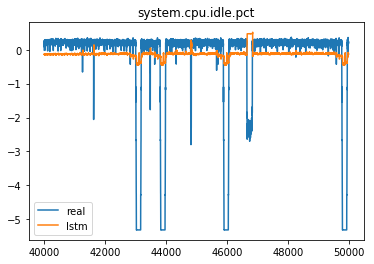

Mean Absolute Error :  0.6852864427403047


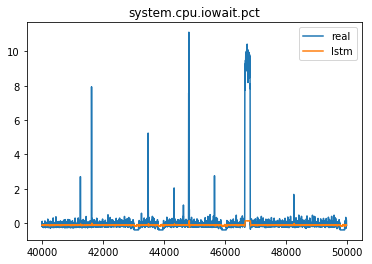

Mean Absolute Error :  0.25743525894232744


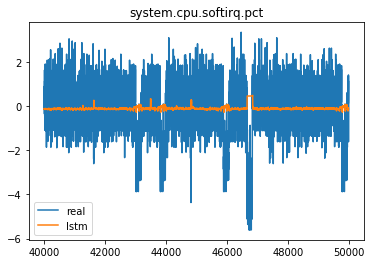

Mean Absolute Error :  0.818659191118241


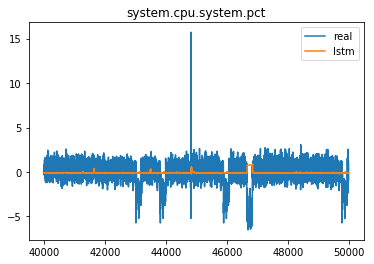

Mean Absolute Error :  0.7978022371364991


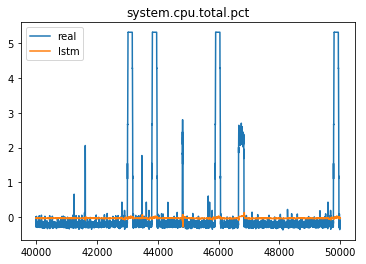

Mean Absolute Error :  0.5612101302376377


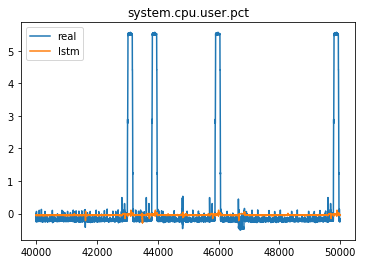

Mean Absolute Error :  0.503658043108292


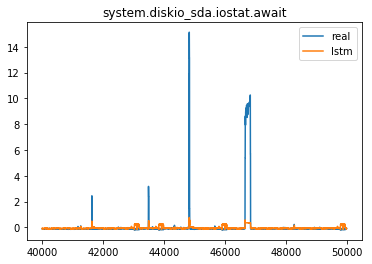

Mean Absolute Error :  0.2415417324760839


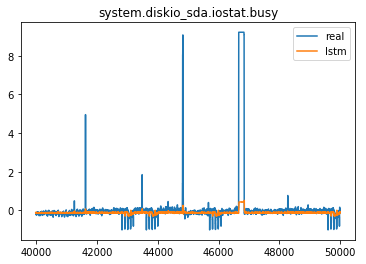

Mean Absolute Error :  0.2772991573852025


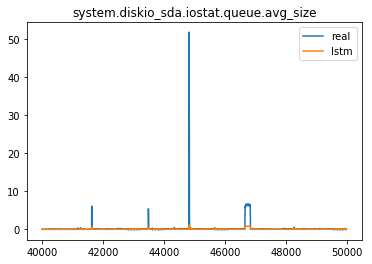

Mean Absolute Error :  0.22661016507671913


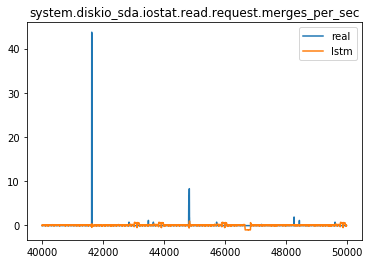

Mean Absolute Error :  0.1941491408004666


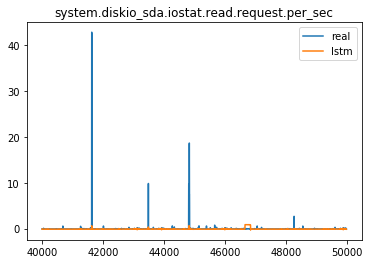

Mean Absolute Error :  0.13663017426211155


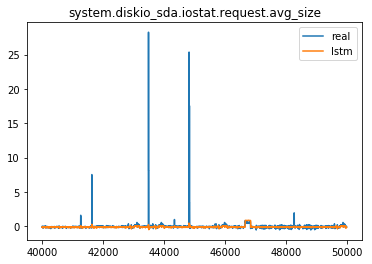

Mean Absolute Error :  0.15616977741659555


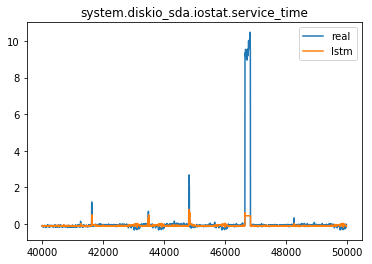

Mean Absolute Error :  0.21428359819152829


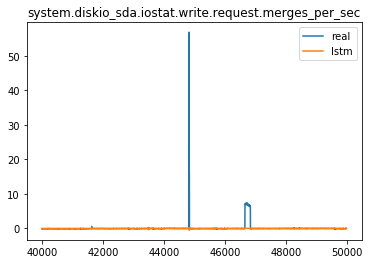

Mean Absolute Error :  0.23038328575800554


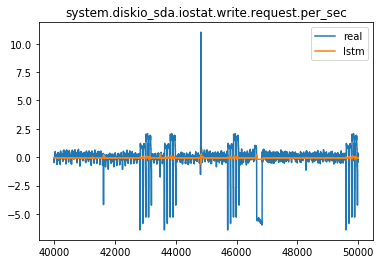

Mean Absolute Error :  0.5776879114031123


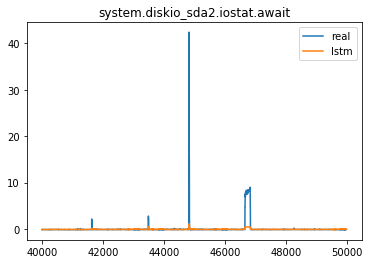

Mean Absolute Error :  0.2196254480484029


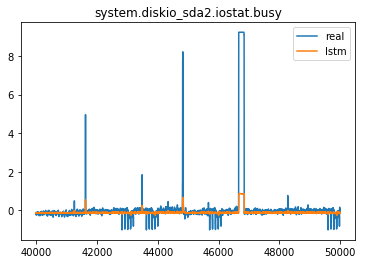

Mean Absolute Error :  0.26843915896262266


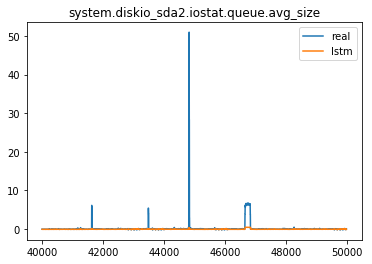

Mean Absolute Error :  0.23254261958006356


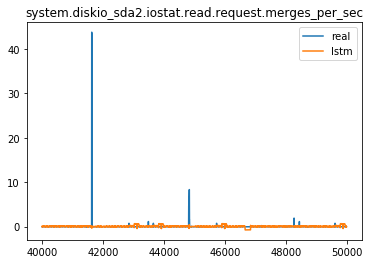

Mean Absolute Error :  0.17467468215833398


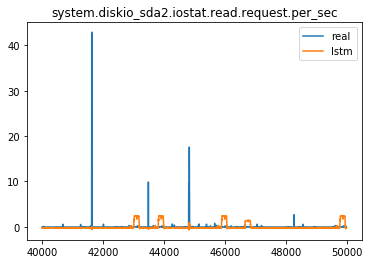

Mean Absolute Error :  0.3990560377426417


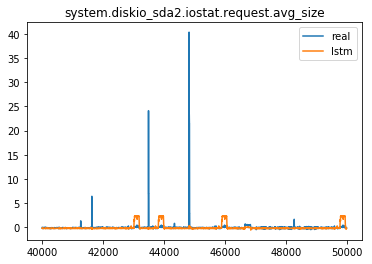

Mean Absolute Error :  0.3503741868683972


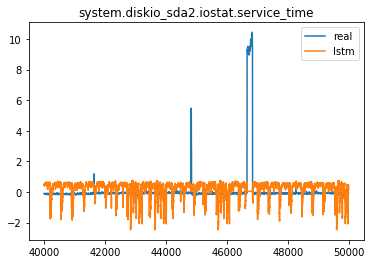

Mean Absolute Error :  0.7577101690340982


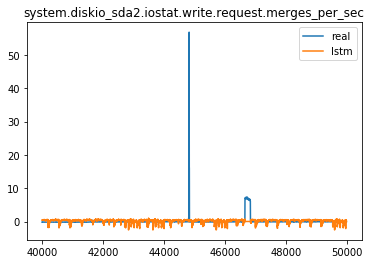

Mean Absolute Error :  0.7466347023201418


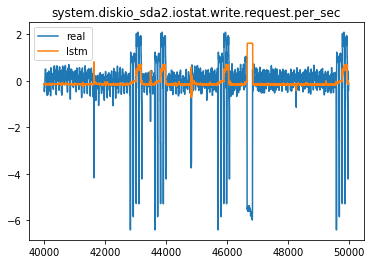

Mean Absolute Error :  0.6247565595020637


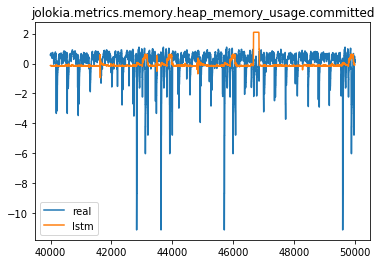

Mean Absolute Error :  0.8366323189120202


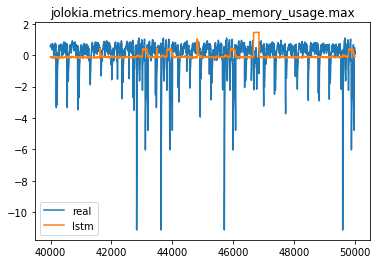

Mean Absolute Error :  0.8172940139450346


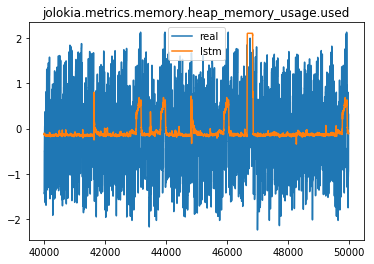

Mean Absolute Error :  0.8556009979734795


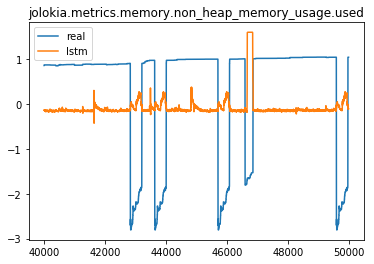

Mean Absolute Error :  1.323661542990395


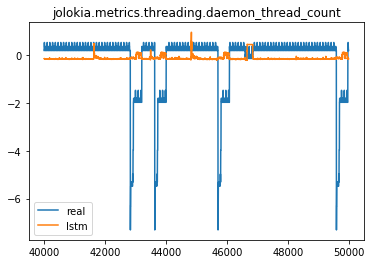

Mean Absolute Error :  0.7613527708747425


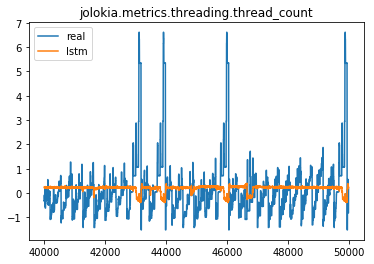

Mean Absolute Error :  0.8201516384847565


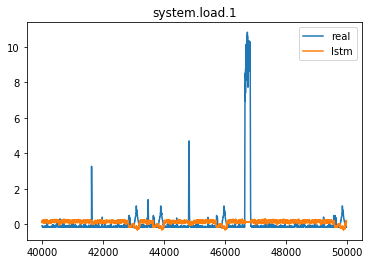

Mean Absolute Error :  0.45486031026373014


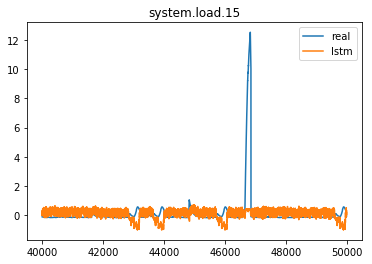

Mean Absolute Error :  0.525634477722964


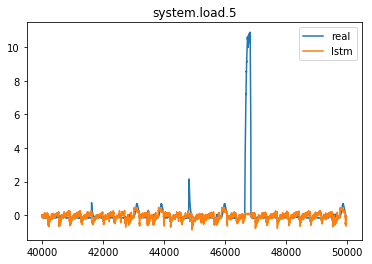

Mean Absolute Error :  0.3398231470151574


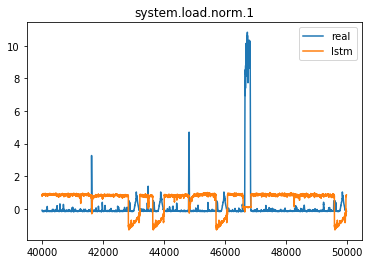

Mean Absolute Error :  1.1029548874813089


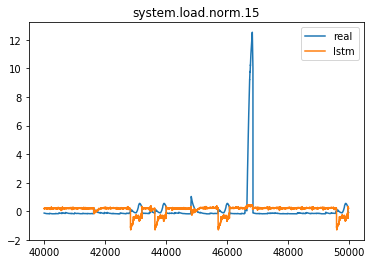

Mean Absolute Error :  0.5551813001957718


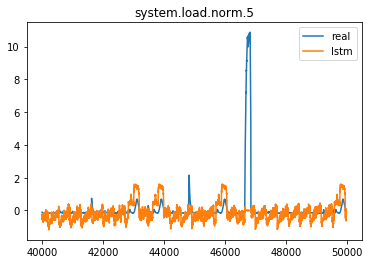

Mean Absolute Error :  0.552216460061932


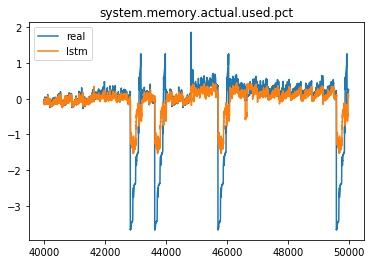

Mean Absolute Error :  0.30353083166677736


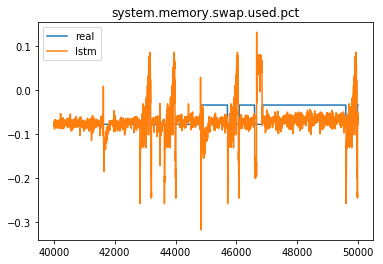

Mean Absolute Error :  0.030053675934218437


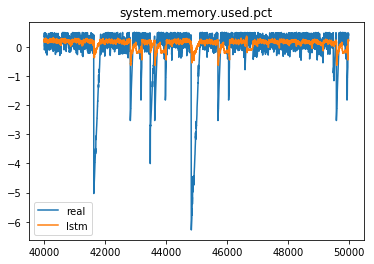

Mean Absolute Error :  0.37565739689798033


In [171]:
f = pyplot.figure()
for i in range(test_dataset_shifted.shape[1]):
    pyplot.plot(test_dataset_shifted[test_dataset_shifted.columns[i]], label='real')
    pyplot.plot(test_dataset_predicted_pd[test_dataset_predicted_pd.columns[i]], label='lstm')
    pyplot.legend()
    pyplot.title(test_dataset_shifted.columns[i])
    pyplot.show()
    print("Mean Absolute Error : ",mean_absolute_error(test_dataset_shifted[test_dataset_shifted.columns[i]], test_dataset_predicted_pd[test_dataset_predicted_pd.columns[i]]))